In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os
from matplotlib.cbook import boxplot_stats
import pickle
sbn.set_context(font_scale=1.5)

In [2]:
os.chdir('C:/Users/joaqu/Box/Emotional-State-Capstone/data/')

# Survey variables

In [3]:
R00 = pd.read_excel('./R00/survey/R00SubjectData_deidentify.xlsx', sheet_name = None)


In [4]:
ALL_MISSING_SUBJECTS = {}

In [5]:
R00.keys()

odict_keys(['Totals', 'Overview', 'Demographics', 'Medical Screening', 'Neuropsychological Measures', 'Activity Tracking', 'PET', 'fMRI', 'fs-fMRI', 'PET-DEQ', 'AVI', 'CES-D', 'GDS', 'ERQ', 'BISBAS', 'BIS', 'TPQ-NS', 'NEO-SF', 'SWLS', 'FTP', 'DOSPERT-Risk Taking', 'DOSPERT-Risk Perception', 'DOSPERT-Expected Benefit', 'KIRBY', 'Social Motives', 'Place in Life', 'SaFE', 'SBQ', 'BDI-SF', 'HPS', 'ASRM', 'PUM', 'RPA', 'CMI', 'MHC-SF', 'PriPos', 'PSPA', 'IPAQ', 'Illness Symptoms', 'Z Font'])

For this project we are going to use only the following variables: 
>- SBQ (Social Behavior Questionary)<br>
>- SWLS<br>
>- TPQ-NS (Trait Dimension Personality Questionary - Novelty Seeking)<br>
>- FTP (Future time perspective)<br>
>- NEO-SF-C (Five Factor Inventory - Conscientiousness)<br>
>- NEO-SF-E (Five Factor Inventory - Extraversion)<br>
>- NEO-SF-N (Five Factor Inventory - Neuroticism)<br>
>- AVI<br>
>- BIS (Impulsiveness)<br>
>- BISBAS (Activation/Inhibition)<br>
>- Medical Screening
>- Demographic

### SBQ

In [6]:
VARIABLE = 'SBQ'
#First row is always the field `subject` for every variable.
R00[VARIABLE]['Subject'].unique().shape[0]

104

In [7]:
R00[VARIABLE].isna().sum()

Subject     0
Q1:        57
Q2:        57
Q3:        58
Q4:        57
Q5:        57
Q6:        57
Q7:        57
Q8:        58
Q9:        57
Q10:       57
Q11:       57
Q12:       57
Q13:       57
Q14:       57
Q15:       57
Q16:       57
Q17:       57
Q18:       57
SBQ         0
dtype: int64

In [8]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]

Text(0, 0.5, '# Missing')

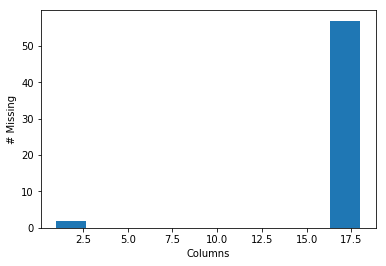

In [9]:
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.hist(miss_subj_amount)
plt.xlabel('Columns')
plt.ylabel('# Missing')

In [10]:
ALL_MISSING_SUBJECTS[VARIABLE] = list(zip(missing_subjects,miss_subj_amount))

In [11]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount < 2].index,:]

,Subject,Q1:,Q2:,Q3:,Q4:,Q5:,Q6:,Q7:,Q8:,Q9:,Q10:,Q11:,Q12:,Q13:,Q14:,Q15:,Q16:,Q17:,Q18:,SBQ
28,1029,5.0,3.0,3.0,1.0,2.0,5.0,3.0,NaN,4.0,3.0,3.0,5.0,5.0,3.0,5.0,3.0,5.0,3.0,61
97,1098,5.0,4.0,NaN,4.0,3.0,5.0,5.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,2.0,3.0,2.0,4.0,60


In [12]:
R00[VARIABLE]['Subject'].shape[0] - miss_subj_amount[miss_subj_amount > 2].count()

48

We could see that we have two different type of missing instances.
On one hand we have completely missing subjects (all fields NaN) and in the other case we see 2 subjects with only one missing value each. Also this values are different (subject  1029 didn't answer question 8, meanwhile 1098 is missing Q3).

It seems that this is completly random for this two subject.
We need to ask to our stakeholder why only 48 subject have complete/almost complete data.

### SWLS

In [13]:
VARIABLE = 'SWLS'
#First row is always the field `subject` for every variable.
R00[VARIABLE]['Subject'].unique().shape[0]

104

In [14]:
R00[VARIABLE].isna().sum()

Subject                                                             0
1) In most ways my life is close to ideal.                         58
2) The conditions of my life are excellent.                        58
3) I am satisfied with my life.                                    58
4) So far I have gotten the important things I want in life.       58
5) If I could live my life over, I would change almost nothing.    58
SWLS                                                                0
dtype: int64

Text(0, 0.5, '# Missing')

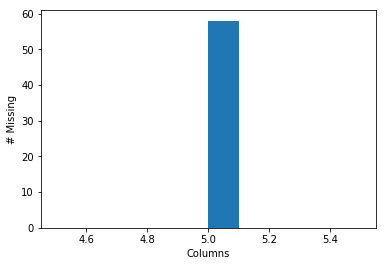

In [15]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.hist(miss_subj_amount)
plt.xlabel('Columns')
plt.ylabel('# Missing')

In [16]:
ALL_MISSING_SUBJECTS[VARIABLE] = list(zip(missing_subjects,miss_subj_amount))

In [17]:
R00[VARIABLE]['Subject'].shape[0] - miss_subj_amount[miss_subj_amount >=  1].count()

47

We dont have individual missing values for `SWLS`. But once again, we have subject with complete missing rows. 
We need to ask why this is happening and compare if is consistenly in the same subjects across this dataset (R00) or it's aleatory

TPQ-NS

In [18]:
VARIABLE = 'TPQ-NS'
#First row is always the field `subject` for every variable.
R00[VARIABLE]['Subject'].unique().shape[0]

104

In [19]:
R00[VARIABLE].isna().sum()

Subject                                                                                                                           0
1) I often try new things just for fun or thrills, even if most people think it's a waste of time.                               57
NS1                                                                                                                               1
2) When nothing new is happening, I usually start looking for something thrilling or exciting.                                   57
NS1.1                                                                                                                             1
3) I usually demand very good practical reasons before I'm willing to change my old ways of doing things.                        57
NS1.2                                                                                                                             1
4) I hate to change the way I do things, even if many people tell me there i

(array([ 1.,  0.,  0.,  0., 56.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  8.2, 15.4, 22.6, 29.8, 37. , 44.2, 51.4, 58.6, 65.8, 73. ]),
 <a list of 10 Patch objects>)

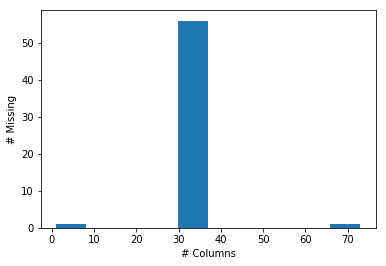

In [20]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('# Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [21]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount > 60].index,:]

,Subject,"1) I often try new things just for fun or thrills, even if most people think it's a waste of time.",NS1,"2) When nothing new is happening, I usually start looking for something thrilling or exciting.",NS1.1,3) I usually demand very good practical reasons before I'm willing to change my old ways of doing things.,NS1.2,"4) I hate to change the way I do things, even if many people tell me there is a new and better way to do it.",NS1.3,5) I like it when people can do whatever they want without strict rules and regulations.,...,NS1.7,33) I like to stay at home better than to travel or explore new places.,NS1.8,34) I like to pay close attention to details in everything I do.,NS2.7,NS1.9,NS2.8,NS3.7,NS4.10,NS_total
0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
list(zip(missing_subjects,miss_subj_amount))

[(1001, 73),
 (1003, 34),
 (1005, 34),
 (1006, 34),
 (1007, 34),
 (1010, 34),
 (1011, 34),
 (1012, 34),
 (1013, 34),
 (1015, 34),
 (1016, 34),
 (1017, 34),
 (1022, 34),
 (1023, 34),
 (1025, 34),
 (1026, 34),
 (1027, 34),
 (1028, 34),
 (1031, 34),
 (1033, 34),
 (1036, 34),
 (1038, 34),
 (1040, 34),
 (1042, 34),
 (1043, 34),
 (1044, 34),
 (1046, 34),
 (1052, 34),
 (1054, 34),
 (1056, 34),
 (1057, 34),
 (1059, 34),
 (1061, 34),
 (1062, 34),
 (1063, 34),
 (1064, 34),
 (1068, 34),
 (1069, 34),
 (1070, 34),
 (1071, 34),
 (1072, 34),
 (1074, 34),
 (1075, 34),
 (1076, 34),
 (1077, 34),
 (1078, 34),
 (1082, 34),
 (1083, 34),
 (1086, 34),
 (1088, 34),
 (1090, 34),
 (1091, 34),
 (1093, 34),
 (1094, 34),
 (1095, 34),
 (1098, 1),
 (1102, 34),
 (1103, 34)]

It seem's that one subject is consistently missing all values (subject 1001)
One more time 57 subjects are missing all data fields. Altough the file is wierd and is assigning a 0 is the value is missing (that's why they have 34  missing fields over 72)
There is subject with only one missing empty columns (subject 1098)

In [23]:
R00[VARIABLE]['Subject'].shape[0] - miss_subj_amount[miss_subj_amount >  1].count()

48

In [24]:
ALL_MISSING_SUBJECTS[VARIABLE] = list(zip(missing_subjects,miss_subj_amount))

# FTP

In [25]:
VARIABLE = 'FTP'
#First row is always the field `subject` for every variable.
R00[VARIABLE]['Subject'].unique().shape[0]

104

In [26]:
print(R00[VARIABLE].shape[1])
R00[VARIABLE].isna().sum()

15


Subject                                                           0
1) Many opportunities await me in the future.                    57
2) I expect that I will set many new goals in the future.        57
3) My future is filled with possibilities.                       57
4) Most of my life lies ahead of me.                             56
5) My future seems infinite to me.                               57
6) I could do anything I want in the future.                     57
7) There is plenty of time left in my life to make new plans.    57
8) I have the sense that time is running out.                    57
Revese                                                            1
9) There are only limited possibilities in my future.            57
Reverse                                                           1
10) As I get older, I begin to experience time as limited.       57
Reverse.1                                                         1
FTP                                             

(array([ 1.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  1.]),
 array([ 9. ,  9.4,  9.8, 10.2, 10.6, 11. , 11.4, 11.8, 12.2, 12.6, 13. ]),
 <a list of 10 Patch objects>)

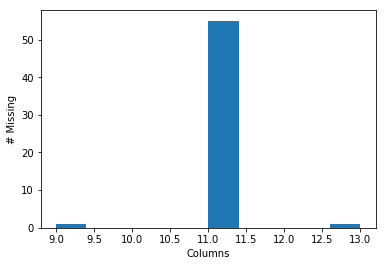

In [27]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [28]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount < 10 ].index,:]

,Subject,1) Many opportunities await me in the future.,2) I expect that I will set many new goals in the future.,3) My future is filled with possibilities.,4) Most of my life lies ahead of me.,5) My future seems infinite to me.,6) I could do anything I want in the future.,7) There is plenty of time left in my life to make new plans.,8) I have the sense that time is running out.,Revese,9) There are only limited possibilities in my future.,Reverse,"10) As I get older, I begin to experience time as limited.",Reverse.1,FTP
9,1010,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,6.0


In [29]:
ammount_sort =  sorted(list(zip(missing_subjects,miss_subj_amount)), key =  lambda elem : elem[1] )
ammount_sort

[(1010, 9),
 (1003, 11),
 (1005, 11),
 (1006, 11),
 (1007, 11),
 (1011, 11),
 (1012, 11),
 (1013, 11),
 (1015, 11),
 (1016, 11),
 (1017, 11),
 (1022, 11),
 (1023, 11),
 (1025, 11),
 (1026, 11),
 (1027, 11),
 (1028, 11),
 (1031, 11),
 (1033, 11),
 (1036, 11),
 (1038, 11),
 (1040, 11),
 (1042, 11),
 (1043, 11),
 (1044, 11),
 (1046, 11),
 (1052, 11),
 (1054, 11),
 (1056, 11),
 (1057, 11),
 (1059, 11),
 (1061, 11),
 (1062, 11),
 (1063, 11),
 (1064, 11),
 (1068, 11),
 (1069, 11),
 (1070, 11),
 (1071, 11),
 (1072, 11),
 (1074, 11),
 (1075, 11),
 (1076, 11),
 (1077, 11),
 (1078, 11),
 (1082, 11),
 (1083, 11),
 (1086, 11),
 (1088, 11),
 (1090, 11),
 (1091, 11),
 (1093, 11),
 (1094, 11),
 (1095, 11),
 (1102, 11),
 (1103, 11),
 (1001, 13)]

The same case than with `SWLS` , one subject with all missing values, 57 with 10 missing columsn (all the questions)
One subject missing all fields 1001
And one subject missing almost all questions 1010 (9 missing questions). We should drop this subject or set his values as NaN

In [30]:
ALL_MISSING_SUBJECTS[VARIABLE] = list(zip(missing_subjects,miss_subj_amount))

### NEO-SF

In [31]:
VARIABLE = 'NEO-SF'
#First row is always the field `subject` for every variable.
print('Unique subjects: ', R00[VARIABLE]['Subject'].unique().shape[0])
print('All subjects : ', R00[VARIABLE]['Subject'].shape[0])

Unique subjects:  104
All subjects :  105


In [32]:
R00[VARIABLE]['Subject'].value_counts()

1103    2
1023    1
1049    1
1051    1
1052    1
1053    1
1054    1
1055    1
1056    1
1057    1
1058    1
1059    1
1060    1
1061    1
1062    1
1063    1
1064    1
1065    1
1066    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    1
1050    1
1048    1
1074    1
1035    1
1025    1
       ..
1019    1
1020    1
1021    1
1102    1
1100    1
1076    1
1087    1
1077    1
1078    1
1079    1
1080    1
1081    1
1082    1
1083    1
1084    1
1085    1
1086    1
1088    1
1099    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    1
1095    1
1096    1
1097    1
1098    1
1024    1
Name: Subject, Length: 104, dtype: int64

Subject 1103 is repeated. Need to fix this.

In [33]:
R00[VARIABLE].loc[R00[VARIABLE]['Subject'] == 1103, : ]

,Subject,1) I am not a worrier.,N-r,2) I like to have a lot of people around me.,E,3) I don't like to waste my time daydreaming.,O-r,4) I try to be courteous to everyone I meet.,A,5) I keep my belongings clean and neat.,...,O.4,"59) If necessary, I am willing to manipulate people to get what I want.",A-r.7,60) I strive for excellence in everything I do.,C.7,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
102,1103,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,1103,Disagree,4.0,Neutral,3.0,Strongly Disagree,5.0,Strongly Agree,5.0,Neutral,...,5.0,Strongly Disagree,5.0,Strongly Agree,5.0,36.0,39.0,34.0,33.0,42.0


It seems that something weird happened when they data entry the data. Let's remove the index 102

In [34]:
R00[VARIABLE] = R00[VARIABLE].drop(102).reset_index().copy()

In [35]:
print('COLUMNS: ',R00[VARIABLE].shape[1])
print('COLUMN WITH MAX NUM OF MISSINGS: ', R00[VARIABLE].isna().sum().max() , '| Column: ' , R00[VARIABLE].isna().sum().idxmax())
R00[VARIABLE].isna().sum()


COLUMNS:  127
COLUMN WITH MAX NUM OF MISSINGS:  104 | Column:  O-r.6


index                                                                                      0
Subject                                                                                    0
1) I am not a worrier.                                                                    56
N-r                                                                                        1
2) I like to have a lot of people around me.                                              56
E                                                                                          1
3) I don't like to waste my time daydreaming.                                             56
O-r                                                                                        1
4) I try to be courteous to everyone I meet.                                              56
A                                                                                          1
5) I keep my belongings clean and neat.                               

(array([47.,  1.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <a list of 10 Patch objects>)

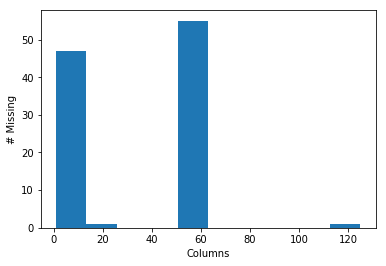

In [36]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

It seems that column O-r.6 is an empty column.
Lets remove this one

In [37]:
R00[VARIABLE] = R00[VARIABLE].drop(columns ='O-r.6').copy()

(array([ 2.,  1.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  13.3,  25.6,  37.9,  50.2,  62.5,  74.8,  87.1,  99.4,
        111.7, 124. ]),
 <a list of 10 Patch objects>)

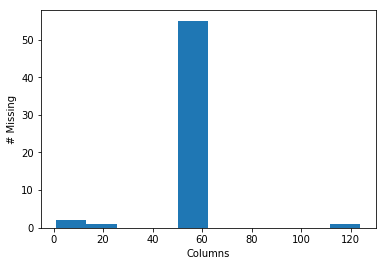

In [38]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [39]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount > 90 ].index,:]

,index,Subject,1) I am not a worrier.,N-r,2) I like to have a lot of people around me.,E,3) I don't like to waste my time daydreaming.,O-r,4) I try to be courteous to everyone I meet.,A,...,O.4,"59) If necessary, I am willing to manipulate people to get what I want.",A-r.7,60) I strive for excellence in everything I do.,C.7,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount < 22 ].index,:]

,index,Subject,1) I am not a worrier.,N-r,2) I like to have a lot of people around me.,E,3) I don't like to waste my time daydreaming.,O-r,4) I try to be courteous to everyone I meet.,A,...,O.4,"59) If necessary, I am willing to manipulate people to get what I want.",A-r.7,60) I strive for excellence in everything I do.,C.7,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
38,38,1039,Agree,2.0,Disagree,2.0,Neutral,3.0,Strongly Agree,5.0,...,4.0,Disagree,4.0,Agree,4.0,26.0,36.0,35.0,49.0,49.0
64,64,1065,Neutral,3.0,Disagree,2.0,Neutral,3.0,Strongly Agree,5.0,...,2.0,Strongly disagree,5.0,Agree,4.0,33.0,28.0,28.0,39.0,32.0
99,99,1100,Strongly Agree,1.0,Strongly Disagree,1.0,Strongly Agree,1.0,Agree,4.0,...,4.0,Neutral,3.0,Agree,4.0,17.0,35.0,31.0,42.0,43.0


In [41]:
ammount_sort =  sorted(list(zip(missing_subjects,miss_subj_amount)), key =  lambda elem : elem[1] )

In [42]:
ammount_sort

[(1039, 1),
 (1100, 1),
 (1065, 14),
 (1003, 60),
 (1005, 60),
 (1006, 60),
 (1007, 60),
 (1010, 60),
 (1011, 60),
 (1012, 60),
 (1013, 60),
 (1015, 60),
 (1016, 60),
 (1017, 60),
 (1022, 60),
 (1023, 60),
 (1025, 60),
 (1026, 60),
 (1027, 60),
 (1028, 60),
 (1031, 60),
 (1033, 60),
 (1036, 60),
 (1038, 60),
 (1040, 60),
 (1042, 60),
 (1043, 60),
 (1044, 60),
 (1046, 60),
 (1052, 60),
 (1054, 60),
 (1056, 60),
 (1057, 60),
 (1059, 60),
 (1061, 60),
 (1062, 60),
 (1063, 60),
 (1064, 60),
 (1068, 60),
 (1069, 60),
 (1070, 60),
 (1071, 60),
 (1072, 60),
 (1074, 60),
 (1075, 60),
 (1076, 60),
 (1077, 60),
 (1078, 60),
 (1082, 60),
 (1083, 60),
 (1086, 60),
 (1088, 60),
 (1090, 60),
 (1091, 60),
 (1093, 60),
 (1094, 60),
 (1095, 60),
 (1102, 60),
 (1001, 124)]

3 subjects missing data, 2 of these are missing one field only.
Subject 1065 is missing 14 questions. Maybe we should invalid this subject results.

In [43]:
R00[VARIABLE]['Subject'].shape[0] - miss_subj_amount[miss_subj_amount >  1].count()

47

In [44]:
ALL_MISSING_SUBJECTS[VARIABLE] = list(zip(missing_subjects,miss_subj_amount))

### AVI

In [45]:
VARIABLE = 'AVI'
#First row is always the field `subject` for every variable.
print('Unique subjects: ', R00[VARIABLE]['Subject'].unique().shape[0])
print('All subjects : ', R00[VARIABLE]['Subject'].shape[0])

Unique subjects:  104
All subjects :  105


In [46]:
R00[VARIABLE]['Subject'].value_counts()[R00[VARIABLE]['Subject'].value_counts() > 1]

1103    2
Name: Subject, dtype: int64

In [47]:
R00[VARIABLE].loc[R00[VARIABLE]['Subject'] == 1103, : ]

,Subject,Actually Feel: Enthusiastic,Actual HAP,Actually Feel: Dull,Actual LAN,Actually Feel: Excited,Actual HAP.1,Actually Feel: Sleepy,Actual LAN.1,Actually Feel: Strong,...,HAN_actual,HA_actual,HAP_ideal,P_ideal,LAP_actual.1,LA_ideal,LAN_ideal,N_ideal,HAN_ideal,HA_ideal
102,1103,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,1103,M,4.0,N,1.0,H,3.0,H,3.0,M,...,2.333333,2.0,4.0,4.0,4.2,2.0,1.333333,2.0,2.0,2.666667


In [48]:
R00[VARIABLE] = R00[VARIABLE].drop(102).reset_index().copy()

In [49]:
print('COLUMNS: ',R00[VARIABLE].shape[1])
print('COLUMN WITH MAX NUM OF MISSINGS: ', R00[VARIABLE].isna().sum().max() , '| Column: ' , R00[VARIABLE].isna().sum().idxmax())
R00[VARIABLE].isna().sum()

COLUMNS:  138
COLUMN WITH MAX NUM OF MISSINGS:  53 | Column:  Actually Feel: Aroused


index                           0
Subject                         0
Actually Feel: Enthusiastic    52
Actual HAP                      1
Actually Feel: Dull            52
Actual LAN                      1
Actually Feel: Excited         52
Actual HAP.1                    1
Actually Feel: Sleepy          52
Actual LAN.1                    1
Actually Feel: Strong          52
Actual HAP.2                    1
Actually Feel: Sluggish        52
Actual LAN.2                    1
Actually Feel: Euphoric        52
Actual HAP.3                    1
Actually Feel: Idle            52
Actual LA                       1
Actually Feel: Aroused         53
Actual HA                       1
Actually Feel: Rested          52
Actual LAP                      1
Actually Feel: Astonished      52
Actual HA.1                     1
Actually Feel: Quiet           52
Actual LA.1                     1
Actually Feel: Surprised       52
Actual HA.2                     1
Actually Feel: Still           53
Actual LA.2   

(array([ 5.,  0.,  0.,  0.,  0., 51.,  0.,  0.,  0.,  1.]),
 array([  1. ,  14.5,  28. ,  41.5,  55. ,  68.5,  82. ,  95.5, 109. ,
        122.5, 136. ]),
 <a list of 10 Patch objects>)

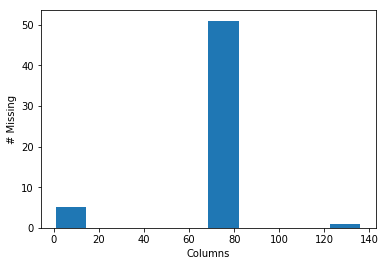

In [50]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [51]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount > 90 ].index,:]

,index,Subject,Actually Feel: Enthusiastic,Actual HAP,Actually Feel: Dull,Actual LAN,Actually Feel: Excited,Actual HAP.1,Actually Feel: Sleepy,Actual LAN.1,...,HAN_actual,HA_actual,HAP_ideal,P_ideal,LAP_actual.1,LA_ideal,LAN_ideal,N_ideal,HAN_ideal,HA_ideal
0,0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount < 20 ].index,:]

,index,Subject,Actually Feel: Enthusiastic,Actual HAP,Actually Feel: Dull,Actual LAN,Actually Feel: Excited,Actual HAP.1,Actually Feel: Sleepy,Actual LAN.1,...,HAN_actual,HA_actual,HAP_ideal,P_ideal,LAP_actual.1,LA_ideal,LAN_ideal,N_ideal,HAN_ideal,HA_ideal
9,9,1010,M,4.0,A,2.0,H,3.0,A,2.0,...,2.000000,2.000000,3.2,4.333333,4.5,2.2,1.666667,1.000000,1.000000,2.000000
11,11,1012,M,4.0,A,2.0,H,3.0,ALL,5.0,...,1.000000,3.333333,5.0,4.000000,4.4,1.8,1.000000,1.000000,1.000000,1.333333
57,57,1058,A,2.0,A,2.0,H,3.0,A,2.0,...,2.333333,2.333333,3.4,4.000000,4.2,2.8,1.333333,2.333333,1.333333,2.333333
99,99,1100,A,2.0,N,1.0,H,3.0,A,2.0,...,1.000000,1.666667,2.4,5.000000,4.6,2.6,1.666667,1.000000,1.000000,2.666667
102,103,1103,M,4.0,N,1.0,H,3.0,H,3.0,...,2.333333,2.000000,4.0,4.000000,4.2,2.0,1.333333,2.000000,2.000000,2.666667


In [53]:
ammount_sort =  sorted(list(zip(missing_subjects,miss_subj_amount)), key =  lambda elem : elem[1] )
ammount_sort

[(1010, 1),
 (1012, 1),
 (1058, 1),
 (1103, 1),
 (1100, 2),
 (1015, 74),
 (1003, 76),
 (1005, 76),
 (1006, 76),
 (1007, 76),
 (1016, 76),
 (1017, 76),
 (1022, 76),
 (1023, 76),
 (1025, 76),
 (1026, 76),
 (1027, 76),
 (1028, 76),
 (1031, 76),
 (1033, 76),
 (1036, 76),
 (1038, 76),
 (1040, 76),
 (1042, 76),
 (1043, 76),
 (1044, 76),
 (1046, 76),
 (1052, 76),
 (1054, 76),
 (1056, 76),
 (1057, 76),
 (1059, 76),
 (1061, 76),
 (1062, 76),
 (1063, 76),
 (1064, 76),
 (1068, 76),
 (1069, 76),
 (1070, 76),
 (1071, 76),
 (1072, 76),
 (1074, 76),
 (1075, 76),
 (1076, 76),
 (1077, 76),
 (1078, 76),
 (1082, 76),
 (1083, 76),
 (1086, 76),
 (1088, 76),
 (1090, 76),
 (1091, 76),
 (1093, 76),
 (1094, 76),
 (1095, 76),
 (1102, 76),
 (1001, 136)]

As in the other cases the subect 1001 is always empty. Let's remove this one

51 with missing +- 76 missing values

5 subject missing  at least one field


In [54]:
ALL_MISSING_SUBJECTS[VARIABLE] = ammount_sort

---

## BIS

In [55]:
VARIABLE = 'BIS'
print('Unique subjects: ', R00[VARIABLE]['Subject'].unique().shape[0])
print('All subjects : ', R00[VARIABLE]['Subject'].shape[0])

Unique subjects:  104
All subjects :  105


In [56]:
R00[VARIABLE]['Subject'].value_counts()[R00[VARIABLE]['Subject'].value_counts() > 1]

1103    2
Name: Subject, dtype: int64

In [57]:
R00[VARIABLE].loc[R00[VARIABLE]['Subject'] == 1103, : ]

,Subject,1) I plan tasks carefully.,Self Control/Nonplanning-reverse,2) I do things without thinking.,Motor/Motor,3) I make up my mind quickly.,Motor/Motor.1,4) I am happy-go-lucky.,Motor/Motor.2,"5) I don't ""pay attention"".",...,BIS_total,Attention_1,CogIns,Motor_1,Perserverance,Self-Control,CogComp,Attention_2,Motor_2,Nonplanning
102,1103,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,1103,2.0,3.0,3.0,NaN,2.0,NaN,3.0,NaN,3.0,...,73.0,14.0,8.0,17.0,6.0,14.0,14.0,22.0,23.0,28.0


In [58]:
R00[VARIABLE] = R00[VARIABLE].drop(102).reset_index().copy()

In [59]:
print('COLUMNS: ',R00[VARIABLE].shape[1])
print('COLUMN WITH MAX NUM OF MISSINGS: ', R00[VARIABLE].isna().sum().max() , '| Column: ' , R00[VARIABLE].isna().sum().idxmax())
R00[VARIABLE].isna().sum()

COLUMNS:  72
COLUMN WITH MAX NUM OF MISSINGS:  104 | Column:  Motor/Motor


index                                                         0
Subject                                                       0
1) I plan tasks carefully.                                   56
Self Control/Nonplanning-reverse                              1
2) I do things without thinking.                             56
Motor/Motor                                                 104
3) I make up my mind quickly.                                56
Motor/Motor.1                                               104
4) I am happy-go-lucky.                                      56
Motor/Motor.2                                               104
5) I don't "pay attention".                                  56
Attention/Attentional                                       104
6) I have "racing" thoughts.                                 56
CogIns/Attentional                                          104
7) I plan trips well ahead of time.                          56
Self-Control/Nonplanning-reverse        

(array([48.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  1.]),
 array([19. , 24.1, 29.2, 34.3, 39.4, 44.5, 49.6, 54.7, 59.8, 64.9, 70. ]),
 <a list of 10 Patch objects>)

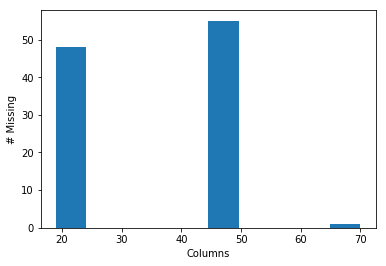

In [60]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
#missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [61]:
#There are some fields that are always missing. Lets drop this columns
all_missing_names = R00[VARIABLE].loc[:,R00[VARIABLE].isna().sum() == 104].columns

In [62]:
R00[VARIABLE] = R00[VARIABLE].drop(columns = all_missing_names).copy()

(array([ 2.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  1.]),
 array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51.]),
 <a list of 10 Patch objects>)

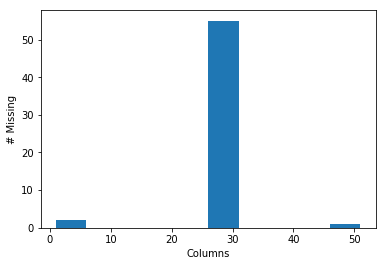

In [63]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
#missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [64]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount > 40 ].index,:]

,index,Subject,1) I plan tasks carefully.,Self Control/Nonplanning-reverse,2) I do things without thinking.,3) I make up my mind quickly.,4) I am happy-go-lucky.,"5) I don't ""pay attention"".","6) I have ""racing"" thoughts.",7) I plan trips well ahead of time.,...,BIS_total,Attention_1,CogIns,Motor_1,Perserverance,Self-Control,CogComp,Attention_2,Motor_2,Nonplanning
0,0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount < 10 ].index,:]

,index,Subject,1) I plan tasks carefully.,Self Control/Nonplanning-reverse,2) I do things without thinking.,3) I make up my mind quickly.,4) I am happy-go-lucky.,"5) I don't ""pay attention"".","6) I have ""racing"" thoughts.",7) I plan trips well ahead of time.,...,BIS_total,Attention_1,CogIns,Motor_1,Perserverance,Self-Control,CogComp,Attention_2,Motor_2,Nonplanning
78,78,1079,4.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,...,54.0,9.0,7.0,16.0,8.0,6.0,8.0,16.0,24.0,14.0
99,99,1100,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,...,45.0,5.0,3.0,9.0,8.0,11.0,9.0,8.0,17.0,20.0


In [66]:
ammount_sort =  sorted(list(zip(missing_subjects,miss_subj_amount)), key =  lambda elem : elem[1] )
ammount_sort

[(1083, 1),
 (1103, 1),
 (1003, 30),
 (1005, 30),
 (1006, 30),
 (1007, 30),
 (1010, 30),
 (1012, 30),
 (1015, 30),
 (1016, 30),
 (1017, 30),
 (1022, 30),
 (1023, 30),
 (1025, 30),
 (1026, 30),
 (1027, 30),
 (1028, 30),
 (1031, 30),
 (1033, 30),
 (1036, 30),
 (1038, 30),
 (1040, 30),
 (1042, 30),
 (1043, 30),
 (1044, 30),
 (1046, 30),
 (1052, 30),
 (1054, 30),
 (1056, 30),
 (1057, 30),
 (1058, 30),
 (1059, 30),
 (1061, 30),
 (1062, 30),
 (1063, 30),
 (1064, 30),
 (1068, 30),
 (1069, 30),
 (1070, 30),
 (1071, 30),
 (1072, 30),
 (1074, 30),
 (1075, 30),
 (1076, 30),
 (1077, 30),
 (1078, 30),
 (1082, 30),
 (1086, 30),
 (1088, 30),
 (1090, 30),
 (1091, 30),
 (1093, 30),
 (1094, 30),
 (1095, 30),
 (1100, 30),
 (1102, 30),
 (1001, 51)]

Again 55 subjects with missing columns. <br>
Subject 1001 is consistenly missing all values <br>
2 subjects missing one column


In [67]:
ALL_MISSING_SUBJECTS[VARIABLE] = ammount_sort

----

### BISBAS

In [68]:
VARIABLE = 'BISBAS'
print('Unique subjects: ', R00[VARIABLE]['Subject'].unique().shape[0])
print('All subjects : ', R00[VARIABLE]['Subject'].shape[0])

Unique subjects:  104
All subjects :  105


In [69]:
R00[VARIABLE]['Subject'].value_counts()[R00[VARIABLE]['Subject'].value_counts() > 1]

1103    2
Name: Subject, dtype: int64

In [70]:
R00[VARIABLE].loc[R00[VARIABLE]['Subject'] == 1103, : ]

,Subject,"1) When I get something I want, I feel excited and energized.",BAS RR,"2) If I think something unpleasant is about to happen, I usually get pretty worked up.",BIS,"3) If I see a chance to get something I want, I move in on it right away.",BAS Drive,4) I worry about making mistakes.,BIS.1,5) I'm always willing to try something new if it will be fun.,...,18) I have very fews fears compared to my friends.,BIS-reverse.1,"19)When good things happen to me, it affects me strongly.",BAS RR.3,"20) When I see an opportunity for something I like, I get excited right away.",BAS RR.4,BIS.5,BAS_D,BAS_FS,BAS_RR
102,1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
103,1103,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,25.0,16.0,19.0,24.0


In [71]:
R00[VARIABLE] = R00[VARIABLE].drop(102).reset_index().copy()

In [72]:
print('COLUMNS: ',R00[VARIABLE].shape[1])
print('COLUMN WITH MAX NUM OF MISSINGS: ', R00[VARIABLE].isna().sum().max() , '| Column: ' , R00[VARIABLE].isna().sum().idxmax())
R00[VARIABLE].isna().sum()

COLUMNS:  46
COLUMN WITH MAX NUM OF MISSINGS:  57 | Column:  15) I feel worried when I think I have done poorly at something.


index                                                                                            0
Subject                                                                                          0
1) When I get something I want, I feel excited and energized.                                   56
BAS RR                                                                                          56
2) If I think something unpleasant is about to happen, I usually get pretty worked up.          56
BIS                                                                                             56
3) If I see a chance to get something I want, I move in on it right away.                       56
BAS Drive                                                                                       56
4) I worry about making mistakes.                                                               56
BIS.1                                                                                           56
5) I'm alw

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 56.]),
 array([ 2. ,  6.2, 10.4, 14.6, 18.8, 23. , 27.2, 31.4, 35.6, 39.8, 44. ]),
 <a list of 10 Patch objects>)

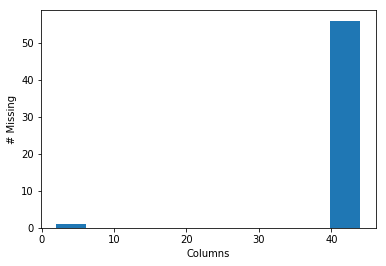

In [73]:
missing_rows = R00[VARIABLE].isna().any(axis=1)
#missing_subjects = R00[VARIABLE]['Subject'][missing_rows]
miss_subj_amount =  R00[VARIABLE].loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [74]:
R00[VARIABLE].iloc[miss_subj_amount[miss_subj_amount < 10 ].index,:]

,index,Subject,"1) When I get something I want, I feel excited and energized.",BAS RR,"2) If I think something unpleasant is about to happen, I usually get pretty worked up.",BIS,"3) If I see a chance to get something I want, I move in on it right away.",BAS Drive,4) I worry about making mistakes.,BIS.1,...,18) I have very fews fears compared to my friends.,BIS-reverse.1,"19)When good things happen to me, it affects me strongly.",BAS RR.3,"20) When I see an opportunity for something I like, I get excited right away.",BAS RR.4,BIS.5,BAS_D,BAS_FS,BAS_RR
57,57,1058,5.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,...,4.0,2.0,5.0,5.0,4.0,4.0,23.0,11.0,11.0,23.0


In [75]:
ammount_sort =  sorted(list(zip(missing_subjects,miss_subj_amount)), key =  lambda elem : elem[1] )
ammount_sort

[(1061, 2),
 (1003, 40),
 (1005, 40),
 (1006, 40),
 (1007, 40),
 (1010, 40),
 (1012, 40),
 (1015, 40),
 (1016, 40),
 (1017, 40),
 (1022, 40),
 (1023, 40),
 (1025, 40),
 (1026, 40),
 (1027, 40),
 (1028, 40),
 (1031, 40),
 (1033, 40),
 (1036, 40),
 (1038, 40),
 (1040, 40),
 (1042, 40),
 (1043, 40),
 (1044, 40),
 (1046, 40),
 (1052, 40),
 (1054, 40),
 (1056, 40),
 (1057, 40),
 (1058, 40),
 (1059, 40),
 (1062, 40),
 (1063, 40),
 (1064, 40),
 (1068, 40),
 (1069, 40),
 (1070, 40),
 (1071, 40),
 (1072, 40),
 (1074, 40),
 (1075, 40),
 (1076, 40),
 (1077, 40),
 (1078, 40),
 (1082, 40),
 (1083, 40),
 (1086, 40),
 (1088, 40),
 (1090, 40),
 (1091, 40),
 (1093, 40),
 (1094, 40),
 (1095, 40),
 (1100, 40),
 (1102, 40),
 (1103, 40),
 (1001, 44)]

Again we have 56 subject with missing values. <br>
Only one subject with one missing columns. <br>
One more time it seems that 1001 is empty <br>

In [76]:
ALL_MISSING_SUBJECTS[VARIABLE] = ammount_sort

In [81]:
os.chdir('C:/Users/joaqu/OneDrive/Escritorio/emotional-states/Code/EDA/')
with open('missing_survey.pickle', 'wb') as handle:
    pickle.dump(ALL_MISSING_SUBJECTS, handle)

In [85]:
keys = ALL_MISSING_SUBJECTS.keys()

In [94]:
all_people = set()

In [95]:
for k in keys:
    values = ALL_MISSING_SUBJECTS[k]
    for val in values:
        all_people.add(val[0])

In [98]:
len(all_people)

63

In [101]:
dict_values = {}
for val in all_people:
    dict_values[val] = 0
    
for val in all_people:
    for k in keys:
        vals = ALL_MISSING_SUBJECTS[k]
        for single in vals:
            if val == single[0]:
                dict_values[val] += single[1]

In [110]:
subject_n_missing = sorted(dict_values.items(), key = lambda elem : (elem[1],elem[0]))

In [127]:
subject_n_missing

[(1029, 1),
 (1039, 1),
 (1098, 2),
 (1065, 19),
 (1058, 71),
 (1100, 73),
 (1103, 110),
 (1011, 128),
 (1013, 128),
 (1010, 197),
 (1012, 199),
 (1061, 236),
 (1083, 245),
 (1015, 272),
 (1003, 274),
 (1005, 274),
 (1006, 274),
 (1007, 274),
 (1016, 274),
 (1017, 274),
 (1022, 274),
 (1023, 274),
 (1025, 274),
 (1026, 274),
 (1027, 274),
 (1028, 274),
 (1031, 274),
 (1033, 274),
 (1036, 274),
 (1038, 274),
 (1040, 274),
 (1042, 274),
 (1043, 274),
 (1044, 274),
 (1046, 274),
 (1052, 274),
 (1054, 274),
 (1056, 274),
 (1057, 274),
 (1059, 274),
 (1062, 274),
 (1063, 274),
 (1064, 274),
 (1068, 274),
 (1069, 274),
 (1070, 274),
 (1071, 274),
 (1072, 274),
 (1074, 274),
 (1075, 274),
 (1076, 274),
 (1077, 274),
 (1078, 274),
 (1082, 274),
 (1086, 274),
 (1088, 274),
 (1090, 274),
 (1091, 274),
 (1093, 274),
 (1094, 274),
 (1095, 274),
 (1102, 274),
 (1001, 464)]

----

# FITBIT DATA

In [116]:
files_fitbit = os.listdir('C:/Users/joaqu/Box/Emotional-State-Capstone/data/R00/fitbit/fitbit_detailed/')

In [117]:
import re

In [152]:
ids = []
for fi in files_fitbit:
    one_file = re.findall(r'R00_[0-9]+_*', fi)
    if len(one_file) > 0:
        id = int(one_file[0].split('_')[1])
        ids.append(id)

In [153]:
ids = set(ids)

In [154]:
missing_survey = {i[0] for i in subject_n_missing}

In [155]:
fitbit_with_missing = set.intersection(ids,missing_survey)
fitbit_with_missing

{1016, 1029, 1039}

In [156]:
print(f'In summary we only can use the data of {len(ids)} subjects.\nThe good news is that we have almost complete data for those subjects.\
      \nThe only exception are subjects {fitbit_with_missing}. Beeing subject 1016, the only complicated case with {dict_values[1016]} missing cells')

In summary we only can use the data of 37 subjects.
The good news is that we have almost complete data for those subjects.      
The only exception are subjects {1016, 1029, 1039}. Beeing subject 1016, the only complicated case with 274 missing cells


---

### Medical Sceening

In [150]:
VARIABLE = 'Medical Screening'
R00[VARIABLE]['Subject'].unique().shape[0]

97

In [159]:
len(set.intersection(set(R00[VARIABLE]['Subject']), ids))

37

In [160]:
#Great let's check if we have complete values for this 37 subject

In [166]:
med_df = R00[VARIABLE].loc[R00[VARIABLE]['Subject'].isin(ids),:].copy()

In [172]:
med_df.shape, med_df.columns

((37, 88), Index(['Subject', 'Med History', 'Height (cm)', 'Weight (kg)',
        'Vitals: Temp (˚F)', 'Vitals: Pulse', 'Vitals: Resp/min', 'Vitals: BP',
        'Allergies:', 'Physical: General Appearance', 'Physical: HEENT',
        'Physical: Cardiovascular', 'Physical: Respiratory',
        'Physical: Gastrointestinal', 'Physical: Endocrine',
        'Physical: Musculoskeletal', 'Physical:Lymphatic',
        'Physical: Dermatologic', 'Neurological: Mental Status',
        'Neurological: Cranial Nerves', 'Neurological: Sensory & Motor System',
        'Neurological: Coordination & Gait', 'Neurological: Reflexes', 'EKG',
        'CBC: White Blood Cell Count (x 1000µL)',
        'CBC: Red Blood Cell Count (M/µL)', 'CBC: Hemoglobin (g/dL)',
        'CBC: Hemocrit (%)', 'CBC: MCV (fL)', 'CBC: MCHC (g/dL)',
        'CBC: RDW (%)', 'CBC: Platelet Count (x 1000µL)', 'CBC: MPV (fL)',
        'CBC: ANC (x1000/µL)', 'CBC: Neutrophils (%)', 'CBC: Lymphocytes (%)',
        'CBC: ALC (x1000/µL)'

In [170]:
print('COLUMNS: ',med_df.shape[1])
print('COLUMN WITH MAX NUM OF MISSINGS: ', med_df.isna().sum().max() , '| Column: ' , med_df.isna().sum().idxmax())
med_df.isna().sum()

COLUMNS:  88
COLUMN WITH MAX NUM OF MISSINGS:  35 | Column:  Notes/Specific Abnormalities:


Subject                                    0
Med History                                4
Height (cm)                                1
Weight (kg)                                1
Vitals: Temp (˚F)                          2
Vitals: Pulse                              1
Vitals: Resp/min                           1
Vitals: BP                                 1
Allergies:                                 1
Physical: General Appearance               1
Physical: HEENT                            1
Physical: Cardiovascular                   1
Physical: Respiratory                      1
Physical: Gastrointestinal                 1
Physical: Endocrine                        1
Physical: Musculoskeletal                  1
Physical:Lymphatic                         1
Physical: Dermatologic                     1
Neurological: Mental Status                1
Neurological: Cranial Nerves               1
Neurological: Sensory & Motor System       1
Neurological: Coordination & Gait          1
Neurologic

(array([35.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <a list of 10 Patch objects>)

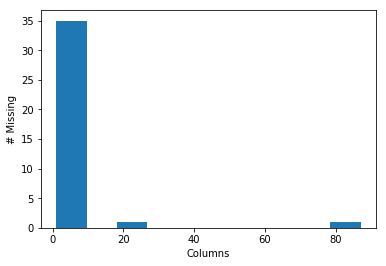

In [174]:
missing_rows = med_df.isna().any(axis=1)
miss_subj_amount =  med_df.loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

It seems that the Specific Abnormalities field is a very rare field, so we should discard this for our analysis

In [183]:
med_df = med_df.drop(columns='Notes/Specific Abnormalities:').copy()
print('COLUMNS: ',med_df.shape[1])
print('COLUMN WITH MAX NUM OF MISSINGS: ', med_df.isna().sum().max() , '| Column: ' , med_df.isna().sum().idxmax())
med_df.isna().sum()

COLUMNS:  87
COLUMN WITH MAX NUM OF MISSINGS:  27 | Column:  HCG (mU/mL) [Women Only]


Subject                                   0
Med History                               4
Height (cm)                               1
Weight (kg)                               1
Vitals: Temp (˚F)                         2
Vitals: Pulse                             1
Vitals: Resp/min                          1
Vitals: BP                                1
Allergies:                                1
Physical: General Appearance              1
Physical: HEENT                           1
Physical: Cardiovascular                  1
Physical: Respiratory                     1
Physical: Gastrointestinal                1
Physical: Endocrine                       1
Physical: Musculoskeletal                 1
Physical:Lymphatic                        1
Physical: Dermatologic                    1
Neurological: Mental Status               1
Neurological: Cranial Nerves              1
Neurological: Sensory & Motor System      1
Neurological: Coordination & Gait         1
Neurological: Reflexes          

(array([27.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  9.5, 18. , 26.5, 35. , 43.5, 52. , 60.5, 69. , 77.5, 86. ]),
 <a list of 10 Patch objects>)

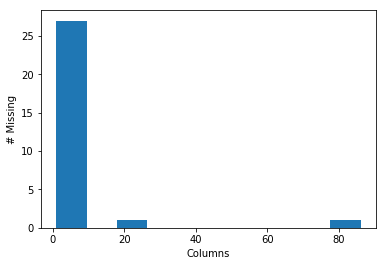

In [182]:
missing_rows = med_df.isna().any(axis=1)
miss_subj_amount =  med_df.loc[missing_rows,:].isna().sum(axis = 1)
plt.xlabel('Columns')
plt.ylabel('# Missing')
plt.hist(miss_subj_amount)

In [185]:
med_df.loc[ miss_subj_amount[miss_subj_amount > 10 ].index, :]

,Subject,Med History,Height (cm),Weight (kg),Vitals: Temp (˚F),Vitals: Pulse,Vitals: Resp/min,Vitals: BP,Allergies:,Physical: General Appearance,...,Toxicology: Amphetamine,Toxicology: Barbiturate,Toxicology: Benzodiazepines,Toxicology: Cocaine,Toxicology: Opiates,Toxicology: Oxycodone,Toxicology: Phencyclidine,Toxicology: Methadone,MRI Eligibility?,PET Eligbility?
15,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1041,Camrese (daily birth control); 6 drinks/month;...,164.0,86.0,97.9,65.0,14.0,115/71,Azithromycin,Normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
print('Missing values: ' , med_df.loc[40].isna().sum())
med_df.loc[40]

Missing values:  22


Subject                                                                                1041
Med History                               Camrese (daily birth control); 6 drinks/month;...
Height (cm)                                                                             164
Weight (kg)                                                                              86
Vitals: Temp (˚F)                                                                      97.9
Vitals: Pulse                                                                            65
Vitals: Resp/min                                                                         14
Vitals: BP                                                                           115/71
Allergies:                                                                     Azithromycin
Physical: General Appearance                                                         Normal
Physical: HEENT                                                                 

>Subject 1016 does not have any data<br>
>Subject 1041 has 22 missing values, but this ones are for Urinalysis and Toxicology.<br>
>It's probable that these subject does not have MRI data, we would need to check this.

Does any subject (besides 1016) have missing values for height, weight or EKG?

In [197]:
med_df.loc[med_df['Subject'] != 1016,['Height (cm)','Weight (kg)', 'EKG']].isna().sum()

Height (cm)    0
Weight (kg)    0
EKG            0
dtype: int64

Let's recode the EKG column with a categorycal variable

In [243]:
med_df['Modif EKG'] = np.nan
for data,idx in zip(med_df['EKG'],med_df['EKG'].index): 
    try:
        data = data.lower()
    except AttributeError as error:
        data = np.nan
        continue
    if re.match(r'abnormal|borderline' , data):
        data = 'Abnormal'
    else:
        data = 'Normal'
    med_df['Modif EKG'].loc[idx] = data

# In summary we only have 37 subjects available<br>
# Subject 1016 is useless, because it does not have any survey data.<br>
# Subjects [1029, 1039] have one missing value each (over more than 500 variables), so we are going to include them.<br>

In [290]:
final_ids = ids.copy()

In [291]:
final_ids.remove(1016)

In [292]:
variables_used = ['Demographics', 'Medical Screening','AVI', 'BISBAS', 'BIS', 'TPQ-NS', 'NEO-SF', 'FTP', 'SBQ','SWLS' ]

In [293]:
SURVEY_DF = R00.copy()

In [295]:
var_to_delete = [i for i in SURVEY_DF.keys() if i not in variables_used]

In [296]:
for i in var_to_delete:
    del SURVEY_DF[i]

In [297]:
SURVEY_DF.keys()

odict_keys(['Demographics', 'Medical Screening', 'AVI', 'BISBAS', 'BIS', 'TPQ-NS', 'NEO-SF', 'SWLS', 'FTP', 'SBQ'])

In [298]:
for i in variables_used:
    print(i)
    SURVEY_DF[i] = SURVEY_DF[i].loc[SURVEY_DF[i]['Subject'].isin(final_ids),:].copy()

Demographics
Medical Screening
AVI
BISBAS
BIS
TPQ-NS
NEO-SF
FTP
SBQ
SWLS


In [304]:
with open('Clean Data/SURVEY_DF.pickle', 'wb') as handle:
    pickle.dump(SURVEY_DF,handle)

# Outlier analysis

In [57]:
with open('Clean Data/SURVEY_DF.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [2]:
def get_outliers(df,variable, columns):
    all_outliers = {}
    if not isinstance(columns,str) and len(columns) > 1:
        for i in columns:
            fliers = boxplot_stats(df[variable].loc[:,i])[0]['fliers']
            print(i, fliers)
            all_outliers[i] = df[variable].loc[:,i].loc[df[variable].loc[:,i].isin(fliers)]
    else:
        fliers = boxplot_stats(df[variable].loc[:,columns])[0]['fliers']
        print(fliers)
        all_outliers[columns] = df[variable].loc[:,columns].loc[df[variable].loc[:,columns].isin(fliers)]
        
    return all_outliers

In [3]:
def print_outlier(all_outliers,df, variable, column):
    dict_df = {}
    if not isinstance(column,str) and len(column) > 1:
        for i in column:
            if all_outliers[i].empty: 
                continue
            idx =  list(all_outliers[i].index)
            #print(idx)
            dict_df[i] = df[variable].loc[idx]
        return dict_df        
    else:
        if all_outliers[column].empty: 
            return  None
        idx =  list(all_outliers[column].index)
        print(idx)
        small_df = df[variable].loc[idx]
        return small_df

### Demographics

In [3]:
df['Demographics'].dtypes

Subject               int64
Occupation           object
Education           float64
Ethnicity            object
Religion             object
Sex                  object
Marital_Status       object
Children            float64
Lives_with           object
Household_income     object
Medications          object
dtype: object

#### Education

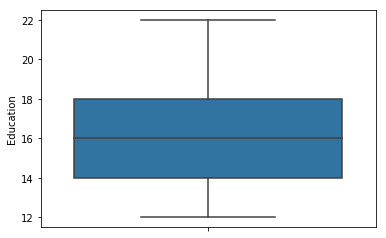

In [74]:
sbn.boxplot(df['Demographics']['Education'], whis = 1.5,orient= 'vertical')
#Data inside whiskers --> the lowest datum still within 1.5 IQR of the lower quartile, and the highest datum still within 1.5 IQR of the upper quartile
#Any data not included between the whiskers should be plotted as an outlier with a dot, small circle, or star, but occasionally this is not done.

#### Children

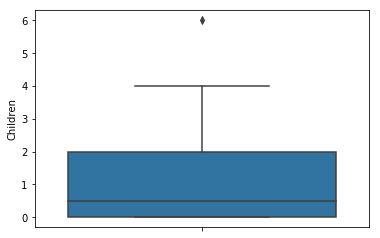

In [75]:
sbn.boxplot(df['Demographics']['Children'], whis = 1.5,orient= 'vertical')

### AVI

In [76]:
avi_short = df['AVI'].iloc[:,-16:-8]

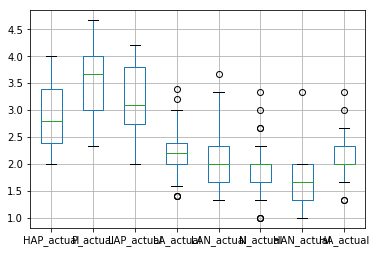

In [77]:
avi_short.boxplot()

Text(0.5, 0, 'Actual emotion')

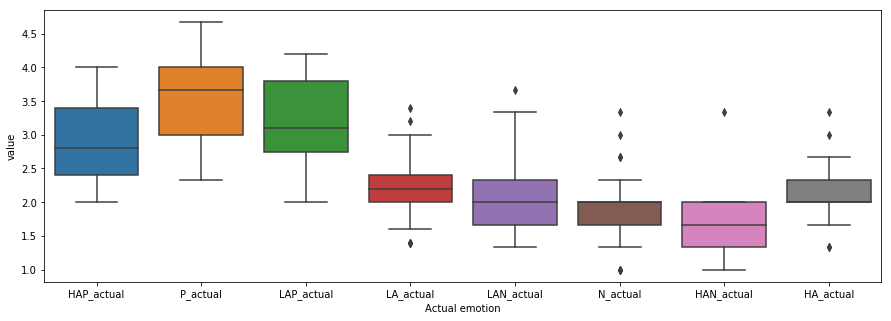

In [294]:
plt.figure(figsize=(15,5))
sbn.boxplot(x="variable", y="value", data= pd.melt(avi_short))
plt.xlabel('Actual emotion')

In [288]:
outliers = print_outlier(get_outliers(df, 'AVI',avi_short.columns), df,'AVI', avi_short.columns)

HAP_actual []
P_actual []
LAP_actual []
LA_actual [1.4 1.4 1.4 3.4 3.2]
LAN_actual [3.66666667]
N_actual [1.         1.         1.         2.66666667 2.66666667 3.
 3.33333333]
HAN_actual [3.33333333]
HA_actual [1.33333333 1.33333333 3.33333333 3.        ]


In [291]:
outliers.keys()

dict_keys(['LA_actual', 'LAN_actual', 'N_actual', 'HAN_actual', 'HA_actual'])

In [293]:
outliers['LAN_actual']

,index,Subject,Actually Feel: Enthusiastic,Actual HAP,Actually Feel: Dull,Actual LAN,Actually Feel: Excited,Actual HAP.1,Actually Feel: Sleepy,Actual LAN.1,...,HAN_actual,HA_actual,HAP_ideal,P_ideal,LAP_actual.1,LA_ideal,LAN_ideal,N_ideal,HAN_ideal,HA_ideal
47,47,1048,M,4.0,N,1.0,A,2.0,ALL,5.0,...,1.0,2.0,5.0,5.0,5.0,1.8,1.0,1.0,1.0,4.666667


### SBQ 

[]


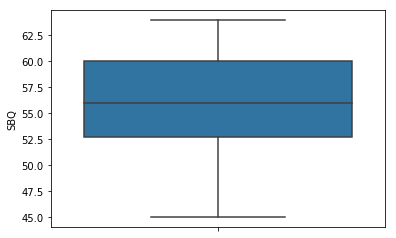

In [280]:
sbn.boxplot(df['SBQ'].loc[:,'SBQ'],orient= 'vertical')
print_outlier(get_outliers(df, 'SBQ','SBQ'), df,'SBQ', 'SBQ')

### SWLS 

[4 6]
[40, 59]


,Subject,1) In most ways my life is close to ideal.,2) The conditions of my life are excellent.,3) I am satisfied with my life.,4) So far I have gotten the important things I want in life.,"5) If I could live my life over, I would change almost nothing.",SWLS
40,1041,0.0,0.0,4.0,0.0,0.0,4
59,1060,0.0,2.0,2.0,2.0,0.0,6


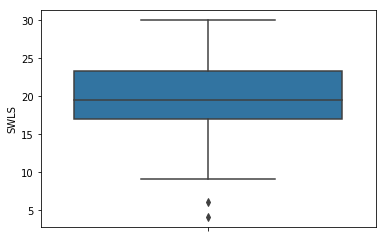

In [281]:
sbn.boxplot(df['SWLS'].loc[:,'SWLS'],orient= 'vertical')
print_outlier(get_outliers(df, 'SWLS','SWLS'), df,'SWLS', 'SWLS')

### TPQ-NS 

[24. 23.]
[29, 83]


,Subject,"1) I often try new things just for fun or thrills, even if most people think it's a waste of time.",NS1,"2) When nothing new is happening, I usually start looking for something thrilling or exciting.",NS1.1,3) I usually demand very good practical reasons before I'm willing to change my old ways of doing things.,NS1.2,"4) I hate to change the way I do things, even if many people tell me there is a new and better way to do it.",NS1.3,5) I like it when people can do whatever they want without strict rules and regulations.,...,NS1.7,33) I like to stay at home better than to travel or explore new places.,NS1.8,34) I like to pay close attention to details in everything I do.,NS2.7,NS1.9,NS2.8,NS3.7,NS4.10,NS_total
29,1030,T,1.0,F,0.0,F,1.0,F,1.0,T,...,1.0,F,1.0,F,1.0,7.0,5.0,5.0,7.0,24.0
83,1084,T,1.0,F,0.0,F,1.0,T,0.0,T,...,0.0,T,0.0,F,1.0,4.0,5.0,7.0,7.0,23.0


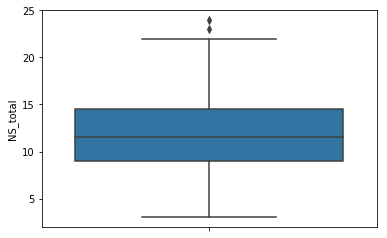

In [282]:
sbn.boxplot(df['TPQ-NS'].loc[:,'NS_total'],orient= 'vertical')
print_outlier(get_outliers(df, 'TPQ-NS','NS_total'), df,'TPQ-NS', 'NS_total')

### FTP 

[2.4]
[38]


,Subject,1) Many opportunities await me in the future.,2) I expect that I will set many new goals in the future.,3) My future is filled with possibilities.,4) Most of my life lies ahead of me.,5) My future seems infinite to me.,6) I could do anything I want in the future.,7) There is plenty of time left in my life to make new plans.,8) I have the sense that time is running out.,Revese,9) There are only limited possibilities in my future.,Reverse,"10) As I get older, I begin to experience time as limited.",Reverse.1,FTP
38,1039,3.0,3.0,4.0,1.0,1.0,2.0,3.0,6.0,2.0,5.0,3.0,6.0,2.0,2.4


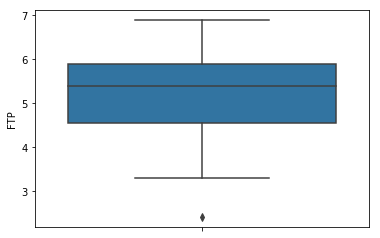

In [284]:
ax = sbn.boxplot(df['FTP'].loc[:,'FTP'],orient= 'vertical')
print_outlier(get_outliers(df, 'FTP','FTP'), df,'FTP', 'FTP')

### BISBAS

In [299]:
small_bisbas = df['BISBAS'].iloc[:,-4:]

Text(0.5, 0, 'Actual emotion')

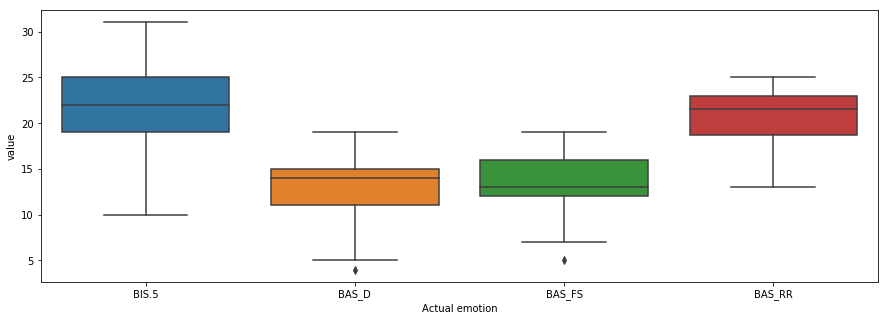

In [300]:
plt.figure(figsize=(15,5))
sbn.boxplot(x="variable", y="value", data= pd.melt(small_bisbas))
plt.xlabel('Actual emotion')

In [303]:
outliers_bisbas = print_outlier(get_outliers(df, 'BISBAS',small_bisbas.columns), df,'BISBAS', small_bisbas.columns)

BIS.5 []
BAS_D [4.]
BAS_FS [5.]
BAS_RR []


In [304]:
outliers_bisbas['BAS_D']

,index,Subject,"1) When I get something I want, I feel excited and energized.",BAS RR,"2) If I think something unpleasant is about to happen, I usually get pretty worked up.",BIS,"3) If I see a chance to get something I want, I move in on it right away.",BAS Drive,4) I worry about making mistakes.,BIS.1,...,18) I have very fews fears compared to my friends.,BIS-reverse.1,"19)When good things happen to me, it affects me strongly.",BAS RR.3,"20) When I see an opportunity for something I like, I get excited right away.",BAS RR.4,BIS.5,BAS_D,BAS_FS,BAS_RR
40,40,1041,5.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,5.0,19.0,4.0,16.0,25.0


In [306]:
outliers_bisbas['BAS_FS']

,index,Subject,"1) When I get something I want, I feel excited and energized.",BAS RR,"2) If I think something unpleasant is about to happen, I usually get pretty worked up.",BIS,"3) If I see a chance to get something I want, I move in on it right away.",BAS Drive,4) I worry about making mistakes.,BIS.1,...,18) I have very fews fears compared to my friends.,BIS-reverse.1,"19)When good things happen to me, it affects me strongly.",BAS RR.3,"20) When I see an opportunity for something I like, I get excited right away.",BAS RR.4,BIS.5,BAS_D,BAS_FS,BAS_RR
28,28,1029,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,1.0,5.0,5.0,1.0,1.0,11.0,6.0,5.0,13.0


In [311]:
small_bis = df['BIS'].iloc[:,-10:]

In [313]:
outliers_bis = print_outlier(get_outliers(df, 'BIS',small_bis.columns), df,'BIS', small_bis.columns)

BIS_total []
Attention_1 [18.]
CogIns [11.]
Motor_1 []
Perserverance []
Self-Control []
CogComp []
Attention_2 []
Motor_2 []
Nonplanning [32. 30. 30.]


Text(0.5, 0, 'Actual emotion')

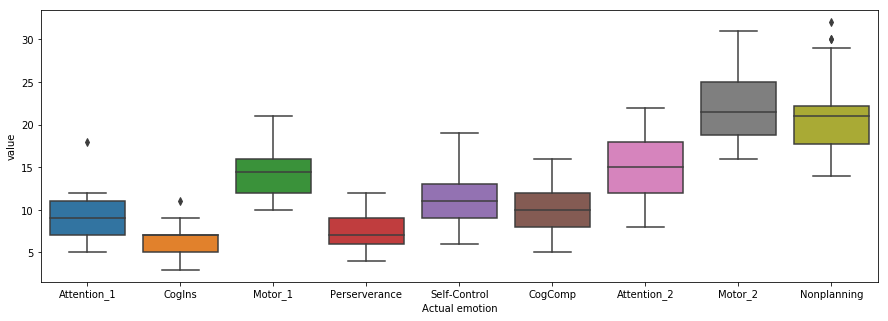

In [315]:
plt.figure(figsize=(15,5))
sbn.boxplot(x="variable", y="value", data= pd.melt(small_bis.iloc[:,1:])) 
plt.xlabel('Actual emotion')

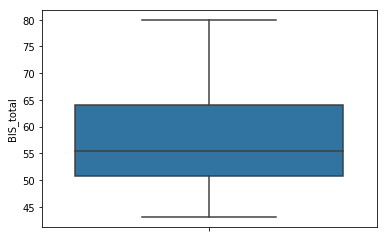

In [316]:
ax = sbn.boxplot(df['BIS'].loc[:,'BIS_total'],orient= 'vertical') #No outliers on the genera scale

### Medical Screening

In [319]:
df['Medical Screening'].head()

,Subject,Med History,Height (cm),Weight (kg),Vitals: Temp (˚F),Vitals: Pulse,Vitals: Resp/min,Vitals: BP,Allergies:,Physical: General Appearance,...,Toxicology: Barbiturate,Toxicology: Benzodiazepines,Toxicology: Cocaine,Toxicology: Opiates,Toxicology: Oxycodone,Toxicology: Phencyclidine,Toxicology: Methadone,MRI Eligibility?,PET Eligbility?,Notes/Specific Abnormalities:
1,1002,Psychiatric disorder-P. Grandmother,161.0,61.5,98.0,73.0,16.0,117/84,Penicillin,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
3,1004,Paxil-2014 (2 month usage),174.0,91.5,97.9,50.0,20.0,132/73,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
7,1008,"Current: EPAP apnea, RX-20mg acifex, 1995- her...",182.0,103.7,97.2,77.0,16.0,118/72,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
8,1009,None,175.0,87.0,96.7,54.0,16.0,118/70,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
13,1014,"HBP, high cholesterol, daughter-MDD, father-MI...",167.6,87.8,98.4,100.0,16.0,111/80,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN


Text(0.5, 0, 'Actual emotion')

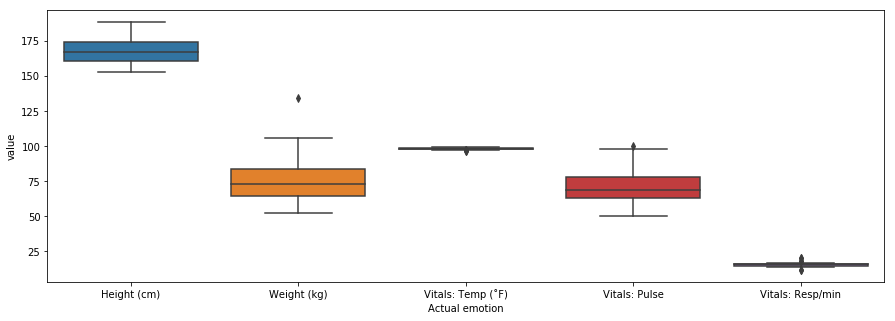

In [323]:
plt.figure(figsize=(15,5))
sbn.boxplot(x="variable", y="value", data= pd.melt(df['Medical Screening'].iloc[:,2:7])) 
plt.xlabel('Actual emotion')

In [23]:
outliers_medical = print_outlier(get_outliers(df, 'Medical Screening', df['Medical Screening'].iloc[:,2:7].columns), df,'Medical Screening', df['Medical Screening'].iloc[:,2:7].columns)

Height (cm) []
Weight (kg) [134.2]
Vitals: Temp (˚F) []
Vitals: Pulse [100.]
Vitals: Resp/min [12. 12. 20. 18. 20. 18.]


C:\Users\joaqu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\joaqu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\joaqu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\joaqu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\joaqu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


In [26]:
outliers_medical['Vitals: Resp/min']

,Subject,Med History,Height (cm),Weight (kg),Vitals: Temp (˚F),Vitals: Pulse,Vitals: Resp/min,Vitals: BP,Allergies:,Physical: General Appearance,...,Toxicology: Barbiturate,Toxicology: Benzodiazepines,Toxicology: Cocaine,Toxicology: Opiates,Toxicology: Oxycodone,Toxicology: Phencyclidine,Toxicology: Methadone,MRI Eligibility?,PET Eligbility?,Notes/Specific Abnormalities:
3,1004,Paxil-2014 (2 month usage),174.0,91.5,97.9,50.0,20.0,132/73,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
20,1021,Father-heart attack in 50s,167.0,81.0,99.1,69.0,12.0,132/74,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
59,1060,"Hypertension; Lisinopril (10mg), HCTZ (25mg); ...",159.5,80.0,97.7,76.0,18.0,130/82,Penicillin,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
78,1079,HTN; hypercholesterolemia; amoldapine; simvast...,172.0,75.0,97.0,88.0,20.0,150/70,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN
83,1084,None,177.0,106.0,97.3,57.0,12.0,123/84,Prilosec OTC,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,yes,yes,NaN
84,1085,NaN,180.0,79.0,98.1,55.0,18.0,108/59,None,Normal,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Yes,Yes,NaN


Let's explore the pressure

In [16]:
vitals = df['Medical Screening']['Vitals: BP'].str.split('/') 
dummy = pd.DataFrame(data = {'Subject':df['Medical Screening']['Subject'], 'Vitals B' : map(lambda x: int(x[0]), vitals), 'Vitals P' :  map(lambda x: int(x[1]), vitals) })

Text(0.5, 1.0, 'Vitals B')

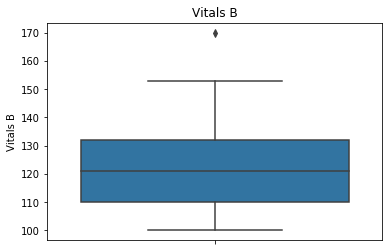

In [21]:
ax1 = sbn.boxplot(dummy['Vitals B'],orient= 'vertical')
ax1.set_title('Vitals B')

Text(0.5, 1.0, 'Vitals P')

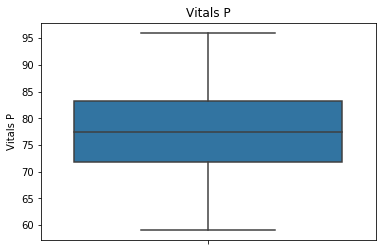

In [22]:
ax2 = sbn.boxplot(dummy['Vitals P'],orient= 'vertical')
ax2.set_title('Vitals P')

## Experiencing sample

In [52]:
experience_sample = pd.read_csv('C:/Users/joaqu/Box/Emotional-State-Capstone/data/R00/experience_sampling/r00-exp-data.csv')
experience_sample.head()

,id,sub_no,survey_no,start,end,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_date,start_time,end_date,end_time
0,1047-1,1047,1,2016-02-19 13:49:36,2016-02-19 13:51:32,1,2,0,0,1,3,0,0,2016-02-19,13:49:36,2016-02-19,13:51:32
1,1047-2,1047,2,2016-02-20 07:32:33,2016-02-20 07:33:40,1,0,0,1,2,2,0,0,2016-02-20,07:32:33,2016-02-20,07:33:40
2,1047-3,1047,3,2016-02-20 15:39:23,2016-02-20 15:41:25,2,2,0,0,2,4,0,0,2016-02-20,15:39:23,2016-02-20,15:41:25
3,1047-4,1047,4,2016-02-20 21:13:34,2016-02-20 21:14:21,3,2,0,0,1,3,0,0,2016-02-20,21:13:34,2016-02-20,21:14:21
4,1047-5,1047,5,2016-02-21 07:11:48,2016-02-21 07:12:34,3,0,0,1,3,1,0,0,2016-02-21,07:11:48,2016-02-21,07:12:34


In [49]:
experience_sample.columns

Index(['id', 'sub_no', 'survey_no', 'start', 'end', 'la_p', 'ha_p', 'ha_n',
       'la_n', 'la', 'p', 'n', 'ha', 'start_date', 'start_time', 'end_date',
       'end_time'],
      dtype='object')

In [50]:
experience_sample.shape

(950, 17)

In R00 dataset, we are only using columns "Q1" to "Q8". And in these columns we do not have any missing values.

We are going to recode this columns so they are coherent with DND

In [64]:
#IDs in Survey Data. We are only going to work with the subjects with complete data
ids = df['AVI']['Subject'].unique()

In [67]:
exp_sample_small = experience_sample.loc[experience_sample['sub_no'].isin(ids),:]

In [69]:
len(exp_sample_small['sub_no'].unique())

36

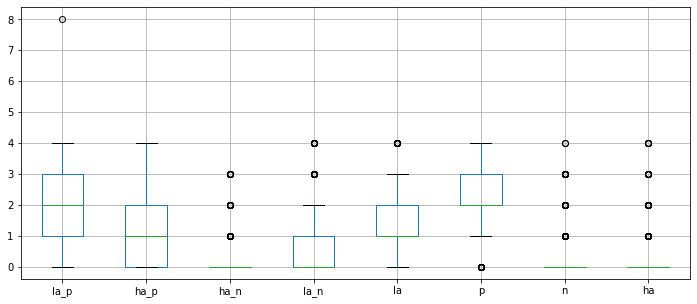

In [87]:
exp_only_emotions = exp_sample_small.iloc[:,5:13]
plt.figure(figsize=(12,5))
exp_only_emotions.boxplot()

In [84]:
all_outliers = {}
for i in exp_only_emotions.columns:
    fliers = boxplot_stats(exp_only_emotions.loc[:,i])[0]['fliers']
    print(i, f'# outliers : {len(fliers)} |', fliers)
    all_outliers[i] = exp_only_emotions.loc[:,i].loc[exp_only_emotions.loc[:,i].isin(fliers)]

la_p # outliers : 1 | [8]
ha_p # outliers : 0 | []
ha_n # outliers : 114 | [2 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 3 3 1 1 1 1 1 1 2 1 1 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 1 2 2 2 3 3 1 2 3 2 2 3 1
 3 2 1]
la_n # outliers : 59 | [3 3 4 3 3 3 4 3 3 3 4 3 3 4 3 3 4 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 4 4 3 3 3 3 4 3 3 3 3 3 4 4 4]
la # outliers : 18 | [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
p # outliers : 39 | [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
n # outliers : 153 | [2 1 1 1 2 1 1 1 1 1 1 1 1 2 3 2 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 3 2 1 1 1 1
 2 1 1 1 1 1 1 3 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1 3 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 2 2
 2 2 3 2 2]
ha # outliers : 209 | [1 1 1 1 1 1 2 1 3 4 1 1 1 2 2 2 

We can observe that for the variables `n` , `ha_n` & `ha` present several outliers. Nevertheless we are going to include all the data. The fact that the values are outliers is not a problem by itself because the values are inside the scale selected.